In [2]:
cd

C:\Users\dydeh


In [3]:
import pandas as pd
mise=pd.read_excel('2018Q1.xlsx')

In [4]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768672 entries, 0 to 768671
Data columns (total 4 columns):
지역      768672 non-null object
측정일시    768672 non-null int64
PM10    721709 non-null float64
PM25    615046 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 23.5+ MB


In [5]:
mise.shape

(768672, 4)

In [7]:
mise.columns

Index(['지역', '측정일시', 'PM10', 'PM25'], dtype='object')

In [14]:
mise['지역'].head()

0    서울 중구
1    서울 중구
2    서울 중구
3    서울 중구
4    서울 중구
Name: 지역, dtype: object

In [15]:
new = mise['지역'].str.split(' ', n = 1, expand = True) 
mise['시도'] = new[0]

In [16]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768672 entries, 0 to 768671
Data columns (total 5 columns):
지역      768672 non-null object
측정일시    768672 non-null int64
PM10    721709 non-null float64
PM25    615046 non-null float64
시도      768672 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 29.3+ MB


In [18]:
mise.head(24)

,지역,측정일시,PM10,PM25,시도
0,서울 중구,2018010101,34.0,19.0,서울
1,서울 중구,2018010102,27.0,14.0,서울
2,서울 중구,2018010103,26.0,14.0,서울
3,서울 중구,2018010104,26.0,15.0,서울
4,서울 중구,2018010105,28.0,16.0,서울
5,서울 중구,2018010106,29.0,17.0,서울
6,서울 중구,2018010107,28.0,16.0,서울
7,서울 중구,2018010108,27.0,14.0,서울
8,서울 중구,2018010109,27.0,14.0,서울
9,서울 중구,2018010110,25.0,12.0,서울


In [23]:
date = mise['측정일시'].astype(str)
mise['연도'] = date.str.slice(start=0, stop=4).astype(str)
mise['월'] = date.str.slice(start=4, stop=6).astype(str)
mise['일'] = date.str.slice(start=6, stop=8).astype(str)
mise['시간'] = date.str.slice(start=8, stop=10).astype(str)

In [24]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768672 entries, 0 to 768671
Data columns (total 9 columns):
지역      768672 non-null object
측정일시    768672 non-null int64
PM10    721709 non-null float64
PM25    615046 non-null float64
시도      768672 non-null object
연도      768672 non-null object
월       768672 non-null object
일       768672 non-null object
시간      768672 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 52.8+ MB


In [26]:
type(date)

pandas.core.series.Series

In [25]:
mise.head()

,지역,측정일시,PM10,PM25,시도,연도,월,일,시간
0,서울 중구,2018010101,34.0,19.0,서울,2018,01,01,01
1,서울 중구,2018010102,27.0,14.0,서울,2018,01,01,02
2,서울 중구,2018010103,26.0,14.0,서울,2018,01,01,03
3,서울 중구,2018010104,26.0,15.0,서울,2018,01,01,04
4,서울 중구,2018010105,28.0,16.0,서울,2018,01,01,05


In [53]:
mise0=mise.groupby(by=['시도','월','일']).max()
mise0.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1530 entries, (강원, 01, 01) to (충북, 03, 31)
Data columns (total 6 columns):
지역      1530 non-null object
측정일시    1530 non-null int64
PM10    1530 non-null float64
PM25    1530 non-null float64
연도      1530 non-null object
시간      1530 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 76.8+ KB


In [54]:
mise0.head()

지역        측정일시   PM10  PM25    연도  시간
시도 월  일                                            
강원 01 01  강원 횡성군  2018010124   78.0  66.0  2018  24
      02  강원 횡성군  2018010224  127.0  89.0  2018  24
      03  강원 횡성군  2018010324   81.0  52.0  2018  24
      04  강원 횡성군  2018010424  103.0  62.0  2018  24
      05  강원 횡성군  2018010524   97.0  76.0  2018  24

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

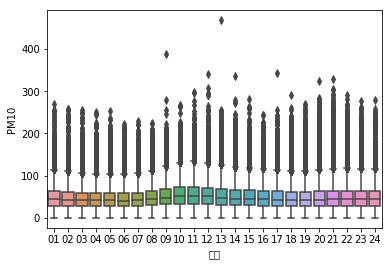

In [68]:
sns.boxplot(x = '시간', y='PM10',data=mise)
plt.show()

In [74]:
mise1 = mise[mise['시간']== '11']

In [76]:
mise1.head()

,지역,측정일시,PM10,PM25,시도,연도,월,일,시간
10,서울 중구,2018010111,31.0,16.0,서울,2018,01,01,11
34,서울 중구,2018010211,44.0,27.0,서울,2018,01,02,11
58,서울 중구,2018010311,36.0,21.0,서울,2018,01,03,11
82,서울 중구,2018010411,37.0,24.0,서울,2018,01,04,11
106,서울 중구,2018010511,46.0,31.0,서울,2018,01,05,11


In [109]:
mise00=mise1.groupby(by=['시도','월','일']).max()
mise00.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1530 entries, (강원, 01, 01) to (충북, 03, 31)
Data columns (total 6 columns):
지역      1530 non-null object
측정일시    1530 non-null int64
PM10    1530 non-null float64
PM25    1530 non-null float64
연도      1530 non-null object
시간      1530 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 76.8+ KB


In [79]:
mise00.head()

지역        측정일시  PM10  PM25    연도  시간
시도 월  일                                           
강원 01 01  강원 횡성군  2018010111  58.0  36.0  2018  11
      02  강원 횡성군  2018010211  92.0  75.0  2018  11
      03  강원 횡성군  2018010311  63.0  49.0  2018  11
      04  강원 횡성군  2018010411  74.0  62.0  2018  11
      05  강원 횡성군  2018010511  84.0  74.0  2018  11

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,4) #set size of Graph

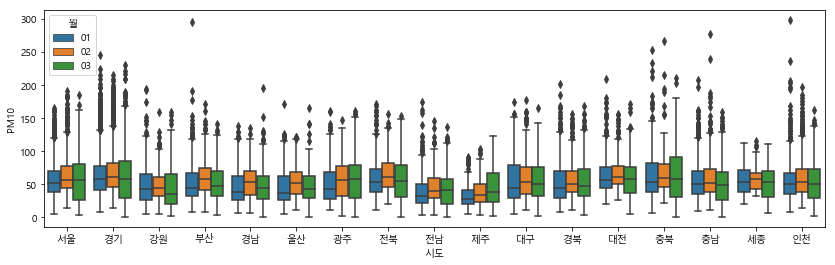

In [88]:
sns.boxplot(x = '시도',hue='월', y='PM10',data=mise1)
plt.show()

In [92]:
mise00.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1530 entries, (강원, 01, 01) to (충북, 03, 31)
Data columns (total 6 columns):
지역      1530 non-null object
측정일시    1530 non-null int64
PM10    1530 non-null float64
PM25    1530 non-null float64
연도      1530 non-null object
시간      1530 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 77.4+ KB


In [90]:
mise00.head()

지역        측정일시  PM10  PM25    연도  시간
시도 월  일                                           
강원 01 01  강원 횡성군  2018010111  58.0  36.0  2018  11
      02  강원 횡성군  2018010211  92.0  75.0  2018  11
      03  강원 횡성군  2018010311  63.0  49.0  2018  11
      04  강원 횡성군  2018010411  74.0  62.0  2018  11
      05  강원 횡성군  2018010511  84.0  74.0  2018  11

In [110]:
mise00.reset_index(inplace = True)

In [97]:
mise00.columns

Index(['시도', '월', '일', '지역', '측정일시', 'PM10', 'PM25', '연도', '시간'], dtype='object')

In [95]:
mise00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 9 columns):
시도      1530 non-null object
월       1530 non-null object
일       1530 non-null object
지역      1530 non-null object
측정일시    1530 non-null int64
PM10    1530 non-null float64
PM25    1530 non-null float64
연도      1530 non-null object
시간      1530 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 107.7+ KB


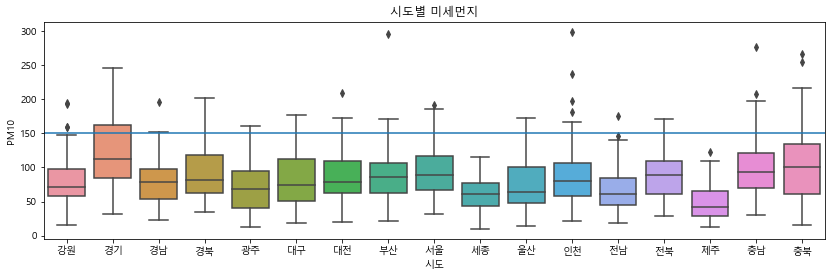

In [140]:
sns.boxplot(x = '시도', y='PM10',data=mise00)
plt.title("시도별 미세먼지")
plt.axhline(151)

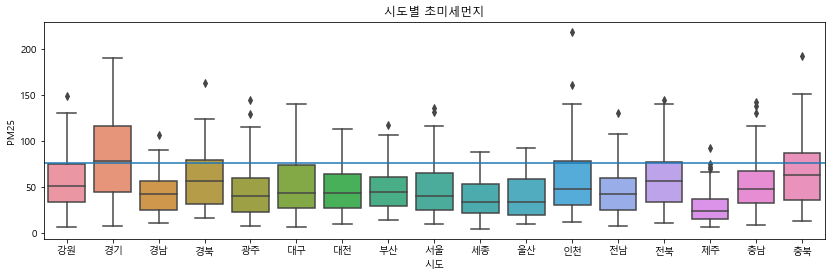

In [141]:
sns.boxplot(x = '시도', y='PM25',data=mise00)
plt.title("시도별 초미세먼지")
plt.axhline(76)

In [105]:
mise00.head()

지역        측정일시  PM10  PM25    연도  시간
시도 월  일                                           
강원 01 01  강원 횡성군  2018010111  58.0  36.0  2018  11
      02  강원 횡성군  2018010211  92.0  75.0  2018  11
      03  강원 횡성군  2018010311  63.0  49.0  2018  11
      04  강원 횡성군  2018010411  74.0  62.0  2018  11
      05  강원 횡성군  2018010511  84.0  74.0  2018  11

In [142]:
mise000=mise1.groupby(by=['지역','월','일']).max()
mise2 = mise000[mise000['시도'] == '경기']



In [143]:
mise2.head()

측정일시  PM10  PM25  시도    연도  시간
지역     월  일                                       
경기 가평군 01 01  2018010111  51.0  25.0  경기  2018  11
          02  2018010211  78.0  41.0  경기  2018  11
          03  2018010311  50.0  38.0  경기  2018  11
          04  2018010411  36.0  31.0  경기  2018  11
          05  2018010511  41.0  38.0  경기  2018  11

In [138]:
#misenew = mise00['지역'].str.split(' ', n = 1, expand = True) 
#mise2['시군구'] = misenew[0]

C:\Users\dydeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [146]:
mise2.reset_index(inplace = True)

In [153]:
mise2.shape

(2790, 9)

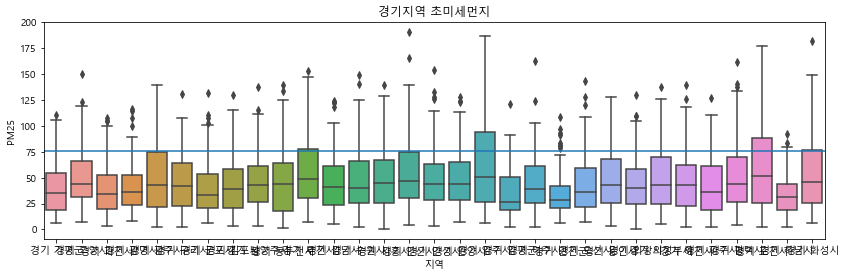

In [149]:
sns.boxplot(x = '지역', y = 'PM25', data = mise2)
plt.title("경기지역 초미세먼지")
plt.axhline(76)

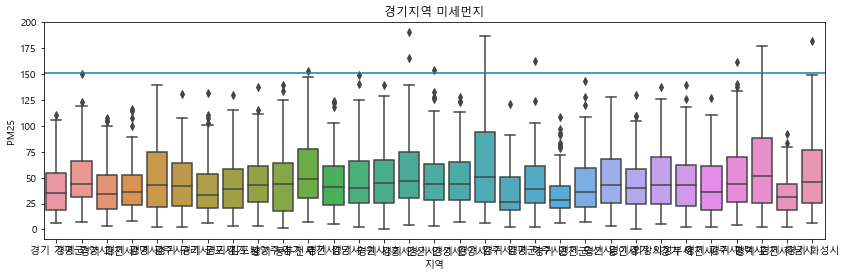

In [150]:
sns.boxplot(x = '지역', y = 'PM25', data = mise2)
plt.title("경기지역 미세먼지")
plt.axhline(151)

In [116]:
mise2.columns

Index(['시도', '월', '일', '지역', '측정일시', 'PM10', 'PM25', '연도', '시간'], dtype='object')

## 과제
수업전 이메일로 보내기<br>
연도별<br>
지역별 <br>
그래프 8개<br>
ppt 8개 설명<br>
모든 변수는 이니셜로<br>
